In [12]:
using GLMakie, GeometryBasics
# using RPRMakie, RadeonProRender
using LinearAlgebra, Colors, FileIO, Downloads #, Images
using CSV, DataFrames

In [2]:
earthquakes = DataFrame(CSV.File("query.csv"));

## depth unit, km
function toCartesian(lon, lat; r = 1.02, cxyz = (0, 0, 0))
    x = cxyz[1] + (r + 1500_000) * cosd(lat) * cosd(lon)
    y = cxyz[2] + (r + 1500_000) * cosd(lat) * sind(lon)
    z = cxyz[3] + (r + 1500_000) * sind(lat)
    return (x, y, z) ./ 1500_000
end

# Earthquakes data for plot
lons, lats = earthquakes.longitude, earthquakes.latitude
depth = earthquakes.depth
mag = earthquakes.mag
toPoints3D = [Point3f([toCartesian(lons[i], lats[i];
    r = -depth[i] * 1000)...]) for i in 1:length(lons)]
ms = (exp.(mag) .- minimum(exp.(mag))) ./ maximum(exp.(mag) .- minimum(exp.(mag)));

In [3]:
# Earth for Plot
n = 1024 ÷ 4 # 2048
θ = LinRange(0, pi, n)
φ = LinRange(-pi, pi, 2 * n)
xe = [cos(φ) * sin(θ) for θ in θ, φ in φ]
ye = [sin(φ) * sin(θ) for θ in θ, φ in φ]
ze = [cos(θ) for θ in θ, φ in φ];

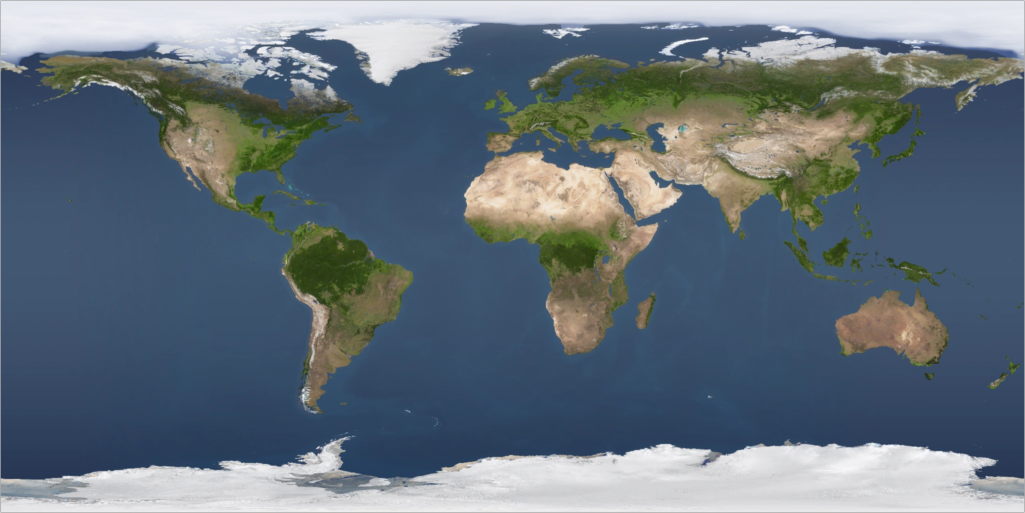

In [13]:
# Earth image
#earth_img = load(Downloads.download("https://www.solarsystemscope.com/textures/download/8k_earth_daymap.jpg"));

# earth_img = Images.load("earth_topo_4k.png")
# earth_img = Images.load("earth_topo_4k_alpha05.png")
earth_img = load("2k_custom_earth_daymap_alpha.png")


In [14]:
typeof(earth_img)

Matrix{RGBA{N0f8}} (alias for Array{RGBA{Normed{UInt8, 8}}, 2})

In [23]:
# Lights for Ax
# radiance = 300
# img = [colorant"grey10" for i in 1:1, j in 1:1]
# lights = [EnvironmentLight(1.0, img'), PointLight(Vec3f(2,2,0.0), RGBf(8.0, 6.0, 5.0))]

In [6]:
GLMakie.activate!()
set_theme!(backgroundcolor = :black)

In [65]:
fig=Figure(; resolution=(1000, 1000))

In [96]:
empty!(fig)

In [97]:
ax = LScene(fig[1, 1]; 
    show_axis=false,
    )

LScene()

In [98]:
Label(fig[1, 1, Top()], 
    "Seismic Events on Earth", 
    padding = (0, 0, 20, 0), 
    color= :white, 
    fontsize = 36)

Label()

In [99]:
sc = meshscatter!(ax, toPoints3D; 
    markersize = ms / 20 .+ 0.001, 
    color = mag,
    # colormap = :nuuk
    # colormap = :linear_bmy_10_95_c78_n256
    colormap = :plasma
    )

MeshScatter{Tuple{Vector{Point{3, Float32}}}}

In [100]:
surface!(ax, xe, ye, ze; 
    color = earth_img*0.6,
    transparency=true
    )

Surface{Tuple{Matrix{Float32}, Matrix{Float32}, Matrix{Float32}}}

In [101]:
Colorbar(fig[1, 2], 
    sc, 
    label="Magnitudes", 
    labelpadding = 14,
    labelcolor= :white, 
    labelsize = 24,
    tickcolor = :white,
    ticklabelcolor =:white,
    height=Relative(0.5)
    )

Colorbar()

In [102]:
save("seismic_earth.png", fig;)